**Fall 2019**

**P556: Applied Machine Learning**

**Assignment #1**

**Due date: September 18, 2019. 11:59 PM**

DO NOT CHANGE THE FUNCTION DEFINITIONS UNLESS APPROVED BY AN AI.

# Problem #1: Linear Regression

##  Problem 1.1 (25 points)

Implement linear regression using gradient descent. Your implementation should be able to handle simple and multiple linear regression.

Note 1: by implementation we mean that everything has to be written from scratch and that you cannot call a linear regression function from a library, such as sklearn. Usage of standard libraries, such as numpy, pandas, etc., is fine. If you are unsure about whether a library can be used, please contact the AIs well in advance of the submission date.

Note 2: You are free to use sklearn to test whether your results match that from a battle-tested library. This is a great way to know before hand whether your submission is correct. Make sure to use the same parameters on both models before you spend an eternity debugging code that is correct but not returning the same values.

In [11]:
import numpy as np
import pandas as pd 

class linear_regression:
    def __init__(self, learning_rate, iterations, 
               fit_intercept=True, normalize=False, coef=None):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = coef
  
    def fit(self,X, y):
        """
        Fit linear model.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array_like, shape (n_samples, n_targets)
            Target values.
        """

        learning_rate = 0.0001      #tried values betwn 0.1 to 0.0001 and got best results for 0.0001   
        iterations = 1000           #tried different values between from 200 to 2000 and it got insignificant after 1000

        n = len(y)                  #no of tuples in training data
        num_col = X.shape[1]        #no of features in the dataset

        coef = []                   #declare theta array at the beginning
        for i in range(num_col+1):
            coef.append(0)          #initialize theta to 0 initially

        """The functions used in following line have been referenced from numpy manual"""
        X = (X-np.mean(X))/(np.amax(X)-np.amin(X))
        
        """To add 1s as first column in X matrix, the function hstack is used from numpy manual"""
        X0 = np.ones((n,1))
        X = np.hstack((X0,X))

        for i in range(iterations):
            Yp = []
            Yp = np.dot(X,coef)           #multiply the X with theta
            for i in range(num_col+1):
                dummy = 0                 #initialize a dummy variable to use in furthur computations
                for j in range(n):
                    #dummy variable updated each time with product of X & diff between actual and predicted y value
                    dummy = dummy + ((Yp[j]-y[j])*X[j][i])
                    #theta updated each time w.r.t dummy and learning rate
                    coef[i] = coef[i]-(2*learning_rate*dummy)/n
        return (coef)
    pass
  
    def predict(self, X):
        """Predict using the linear model
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
        Samples.
        Returns
        -------
        C : array, shape (n_samples,)
            Returns predicted values.
        """
        y = []
        
        """The functions used in following line have been referenced from numpy manual"""
        X = (X-np.mean(X))/(np.amax(X)-np.amin(X))
        
        """To add 1s as first column in X matrix, the function hstack is used from numpy manual"""
        X0 = np.ones((X.shape[0],1))
        X = np.hstack((X0,X))
        
        num_col = X.shape[1]                
        for i in range(len(X)):             #consider all the tuples in the X
            k = 0
            for j in range(num_col):        #consider all the columns in the X
                k = k + X[i][j]*coef[j]     #multiply the X_test data with the coef we calculated in fit function
            y.append(k)                 
        return y
    pass

## Problem 1.2 (10 points)

- Split the Boston Housing dataset into train and test sets (70% and 30%, respectively) (5 points). 
- Fit your linear regression implementation using the training set and print your model's coefficients. Make predictions for the test set using your fitted model (5 points).

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Your code goes here
data = load_boston()
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
coef = linear_regression.fit(1,X_train,y_train)
y_pred = linear_regression.predict(1,X_test)
print(y_pred)

[25.026926006105825, 22.92228136743191, 11.507472081989668, 24.31622118917274, 16.130565622696423, 25.07910247154768, 26.09573132533813, 25.01820844779173, 17.940091264795004, 24.723974462289178, 24.50701860296393, 24.839479009308302, 26.209658850615078, 22.20554710752627, 21.623759569152774, 21.31760109364329, 24.975266292862447, 25.679838311098784, 23.87707058521482, 24.90327863184643, 17.24195180588063, 25.864482339818046, 24.718032619649982, 24.992084089632453, 24.289199788516502, 23.076022578692086, 24.91186679056463, 24.737628831298494, 26.452394454037485, 15.454578965169302, 24.99216812892567, 24.241613319351803, 22.42880645073489, 25.88416925961673, 18.651529945704993, 18.201148861048114, 12.577367181665524, 22.06688810357779, 23.547001306534504, 25.527672980651346, 24.688748679611034, 17.321074610298158, 25.865168025568686, 24.187141066550158, 24.360529502097048, 24.36280065508872, 23.173568277138198, 23.079609490683975, 25.480140383940054, 21.810688847342327, 17.6640226508265

## Problem 1.3 (10 points)

Identify the variable or set of variables that will minimize the mean square error (MSE). Hint: this is where your function being able to handle simple and multiple regression becomes useful.

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.feature_selection import VarianceThreshold

mse = (mean_squared_error(y_test, y_pred))
print(mse)

""""var=[]
for i in range(X.shape[1]):
    Xi = []
    for j in range(X.shape[0]):
        Xi.append([j][i])
    var.append(np.var(X[j][i]))        
print (var)"""

49.59410629564235


'"var=[]\nfor i in range(X.shape[1]):\n    Xi = []\n    for j in range(X.shape[0]):\n        Xi.append([j][i])\n    var.append(np.var(X[j][i]))        \nprint (var)'

## Problem 1.4 (5 points)

1. How do you interpret that a variable causes a model's mean square error to increase? (2 points)
  
     - Answer: Mean Square error is basically how far the predicted values are present from the actual values. There are two contributing factors associated to MSE, bias and variance! The bias is how far all the predicted values are from the actual values. It is the assumptions made to make easier for model to fit to the target values! The variance is how much target values change with the change in the training data. It tells us how the model can perform well for given training data and might not be that accurate for different training set. The mean square error increases with the increase in either bias or variance. Mathematically it can be simply represented as MSE = (Bias)^2 + Variance. In such ways, the variable can cause the mean square error to increase. So to reduce the mean square error, you can't reduce bias and variance at the same time. Hence there is a certain tradeoff between bias and variance to achieve a better model or a least possible mean squared error.
      
      
2. Why we would want to normalize our variables? (1 point)
      
    - Answer: Any given dataset has different features and these features have different values in different ranges depending on what the feature is. It is very complicated to work on such data and make predictions as one feature might have all values in single digit and the other feature may have all values as three digit numbers.For e.g, in any housing dataset the feature #bedrooms will always have a value at the max 10, whereas the feature area of house may have values ranging 1000-4000. So its necessary to normalize the variables and bring them to common scale in order to perform computations on the data!


3. A model fitted using the exact same split dataset with normalized values will generate the same coefficients as a model that was fitted using values that haven't been normalized. Clearly state whether that statement is true or false and explain your reasoning. (2 points)
  
   - Answer: The given statement is false. When the coeffecient is calculated for the split dataset with values which are not normalized, it will do all the computations on the actual values of the data. The coefficient is updated for each iteration depending upon the values of the given dataset. However when we normalize the same set of split dataset, those values are scaled to a particular range. Now the coefficient is calculated with respect to these values and in accordance with this new scale. Also, I checked this by experimenting it in my code once and thus cross verified it on actual dataset.

# Problem 2: Binary Classification

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

**Note**: Do not confuse the $x$ and $y$ in the equation of line $ax + by + c = 0$ with $\mathcal{X} $ and $\mathcal{Y}$. Instead imagine these $x$ and $y$ as the 2-D coordinate system on which you have different points which should lie on 2 sides of the line $ax + by + c = 0$. For example, there is a point (2,3) in the 2-D system where $x = 2$ and $y = 3$.

In [22]:
def generate_dataset(k0, k1):
    """
    Parameters
    ----------
    k0 : integer, number of samples for class 0
    k1 : integer, number of samples for class 1

    Returns
    -------
    X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    """

    from matplotlib import pyplot as plt
    import random
    import numpy as np

    x = np.linspace(-20,20,10)
    a = random.randint(-20,20)
    b = random.randint(-20,20)

    #Below condition is inserted when b is selected as 0, it gave me error as b is a denominator in eqn of line
    while b==0:                      
        b=random.randint(-20,20)

    c = random.randint(-20,20)
    z = []
    while (len(z)<k0):                  #generate k0 points
        p = random.randint(-20,20)
        q = random.randint(-20,20)
        if(((a*p)+(b*q)+c)<0):          #check the condition ax+by+c<0 so that k0 points belong to class 0
            z.append((p,q))
    for i in range(k0):
        plt.scatter(z[i][0],z[i][1],color='blue')   #plot all those k0 points belonging to class 0 as blue color

    r = []
    while (len(r)<k1):                 #generate k1 points
        p = random.randint(-20,20)
        q = random.randint(-20,20)
        if(((a*p)+(b*q)+c)>0):         #check the condition ax+by+c>0 so that k1 points belong to class 1
            r.append((p,q))      
    for i in range(k1):
        plt.scatter(r[i][0],r[i][1],color='green')  #plot all those k1 points belonging to class 1 as green color

    y = (a*x+c)/(-1*b)
    plt.plot(x, y, '-r')         #plot the random line ax+by+c=0 where a,b,c are random

    plt.show()

    X = []
    y = []
    X=z+r                   #X is input space with all k0 and k1 points
    for i in range(k0):
        y.append(-1)        #y will be -1 if it belongs to class 0
    for i in range(k1):
        y.append(1)         #y will be 1 if it belongs to class 1
    X=z+r
    return(X,y)
pass

## Problem 2.2 (35 points)

If $\mathcal{Y}$ is the variable you are trying to predict using a feature $\mathcal{X}$ then in a typical Machine Learning problem, you are tasked with a target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$ i.e. Find $f$ such that  $\mathcal{Y}$  = $f(\mathcal{X})$


When you are given a dataset for which you do not have access the target function $f$, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in Problem 2.1. As we previously mentioned, that line can be represented as $ax + by + c = 0$.

The goal here is to correctly find out the coefficients $a$, $b$, and $c$, represented below as $\bf{w}$ which is a vector. The algorithm to find it is a simple iterative process: 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.



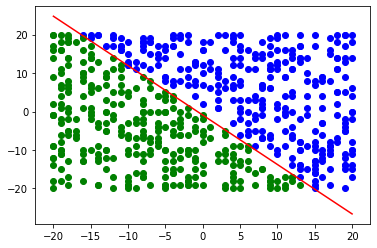

The weight vector is :
[-75, -40]


In [27]:
def fit_line(X, y):
    """Predict using the binary classification model. Use the dataset generated 
    using generate_data() as input for this function.
    
    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Samples.
    y : array_like, shape (n_labels, 1)
    
    Returns
    -------
    w : array, shape (1,n_features)
        Returns the final weight vector w.  
    """
    import random
    
    num_col = (len(X[0]))                #number of features i.e. features in X
    w = []
    for i in range(num_col):
        w.append(random.randint(0,10))   #initialize weight vector with random values
    
    yp = []
    for i in range(len(y)):
        yp.append(0)                     #initialize the y-predicted list to zero              
    
    list = []
    #below while condition ensures that all the samples are picked up
    while(len(list)<len(y)):
        i = random.randint(0,len(y)-1)   #choose any random row from X
        if i not in list:
            #y = w1x1 + w2x2 + w3x3......wnxn where w is weight vector and Xi depends on no. of features
           
            y_out = 0                         #initialize a dummy variable with 0
            for j in range(num_col):      
                y_out = y_out + w[j]*X[i][j]  #multiply the weight vector w with the corresponding X values
            
            #The output space should be [-1,1]
            if y_out<0:
                yp[i]=-1
            else:
                yp[i]=1
                
            #If the predicted value is not equal to actual value, update the weights
            if yp[i]!=y[i]:
                for j in range(num_col):
                    w[j]= w[j]+(y[i]*X[i][j])    #𝐰(𝑡+1) = 𝐰𝑡 + 𝑦⋅𝐱 
            else:
                list.append(i)  #it will append the sample to list only if it has been correctly classified    
    return(w)
pass

# Main Function
if __name__ == "__main__":
    X,y = generate_dataset(300,300)
    W = fit_line(X,y)
    print('The weight vector is :')
    print(W)

### Problem 2.3 (10 points)
- Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required. (5 points)

  - Answer: The data we have is linearly seperable data i.e. it does not have any outliers beyond its class. The execution is carried out till all the misclassified tuples are properly classified. At any point in execution, the difference between    |Wk-Wi| is bounded by a function say Ck where C is constant. Also as the perceptron algorithm proceeds, the number of misclassifications k approaches close to function. The overall result follows from this bound and the fact that, at each iteration until convergence, the perceptron classifies at least one vector each time. Also as there are only two classes possible for the output space, and as we take the dot product of the weight vector and the features the cosine has just the possibilities of either less than or greater than 90. It will go on till all the tuples are correctly classified and this is achieved as the data is linearly seperable. 

- What happens when the data is not linearly separable? What can be done to salvage the situation?

  - Answer: When the data is not linearly seperable, there is no gurantee that the algorithm will convergence nor any gurantee of the accuracy. In above code, we specify to classify each tuple till all are correctly classified. It happens because the data is linearly seperable but it won't work in case of linearly inseperable data. In order to solve this problem, we can provide some condition to the algorithm to help determine when it should stop trying to fit the data. The conditions can be anything which would tell the algorithm when to stop. For example, define the number of iterations beforehand or set some minimum value for the number of tuples which are not properly classified. We can also try to extend it in higher dimensional space so that the data might be linearly seperable in higher dimension than the lower one.